In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

import uproot

In [2]:
f = uproot.open("/home/lee/hd1/glee_added_rootfiles/prodgenie_bnb_nc_delta_overlay_run1_PF/UBGenieFluxSmallUni.root")["wcpselection"]
weight_df = f["T_weight"].arrays(["weight_cv", "weight_spline", "All_UBGenie"], library="pd")
glee_sel_df = f["T_eval"].arrays("gl_sel_type", library="pd")
df_run1 = pd.concat([weight_df, glee_sel_df], axis=1)

print("loaded run 1")

f = uproot.open("/home/lee/hd1/glee_added_rootfiles/prodgenie_bnb_nc_delta_overlay_run2_PF/UBGenieFluxSmallUni.root")["wcpselection"]
weight_df = f["T_weight"].arrays(["weight_cv", "weight_spline", "All_UBGenie"], library="pd")
glee_sel_df = f["T_eval"].arrays("gl_sel_type", library="pd")
df_run2 = pd.concat([weight_df, glee_sel_df], axis=1)

print("loaded run 2")


f = uproot.open("/home/lee/hd1/glee_added_rootfiles/prodgenie_bnb_nc_delta_overlay_run3_PF/UBGenieFluxSmallUni.root")["wcpselection"]
weight_df = f["T_weight"].arrays(["weight_cv", "weight_spline", "All_UBGenie"], library="pd")
glee_sel_df = f["T_eval"].arrays("gl_sel_type", library="pd")
df_run3 = pd.concat([weight_df, glee_sel_df], axis=1)

print("loaded run 3")

# manually merge by getting numpy arrays and concatenating them
# this was too slow for some reason 
# df = pd.concat([df_run1, df_run2, df_run3], axis=0, ignore_index=True)

weight_cv = np.concatenate([df_run1["weight_cv"].to_numpy(), df_run2["weight_cv"].to_numpy(), df_run3["weight_cv"].to_numpy()])
weight_spline = np.concatenate([df_run1["weight_spline"].to_numpy(), df_run2["weight_spline"].to_numpy(), df_run3["weight_spline"].to_numpy()])
All_UBGenie = np.concatenate([df_run1["All_UBGenie"].to_numpy(), df_run2["All_UBGenie"].to_numpy(), df_run3["All_UBGenie"].to_numpy()])
All_UBGenie_list = list(All_UBGenie)
gl_sel_type = np.concatenate([df_run1["gl_sel_type"].to_numpy(), df_run2["gl_sel_type"].to_numpy(), df_run3["gl_sel_type"].to_numpy()])

print("making new dataframe")
df = pd.DataFrame({"weight_cv": weight_cv, "weight_spline": weight_spline, "All_UBGenie": All_UBGenie_list, "gl_sel_type": gl_sel_type})

print("done")

print(np.min(df["weight_cv"]), np.max(df["weight_cv"]), np.min(df["weight_spline"]), np.max(df["weight_spline"]))

df

loaded run 1
loaded run 2
loaded run 3
making new dataframe
done
1.0 1.0 1.0 1.0


,weight_cv,weight_spline,All_UBGenie,gl_sel_type
0,1.0,1.0,"[0.0, 0.01864263415336609, 0.6778406500816345,...",-1
1,1.0,1.0,"[0.9370959997177124, 0.005362525582313538, 0.1...",-1
2,1.0,1.0,"[0.9127565026283264, 0.0054990737698972225, 0....",-1
3,1.0,1.0,"[0.9965249300003052, 0.005013846792280674, 0.2...",-1
4,1.0,1.0,"[0.9504627585411072, 0.0070269727148115635, 0....",-1
...,...,...,...,...
220580,1.0,1.0,"[0.807391345500946, 0.002291326643899083, 0.12...",-1
220581,1.0,1.0,"[0.8936817646026611, 0.002453963505104184, 0.1...",-1
220582,1.0,1.0,"[1.0314058065414429, 0.007268574554473162, 0.2...",-1
220583,1.0,1.0,"[0.7538554072380066, 0.0022539219353348017, 0....",-1


In [3]:
All_UBGenie = df["All_UBGenie"].to_numpy()
All_UBGenie = np.array([All_UBGenie[i] for i in range(len(All_UBGenie))])
All_UBGenie.shape

(220585, 600)

In [4]:
real_600_unis = np.sum(All_UBGenie, axis=0) / np.sum(weight_cv)
median_weighted_sum = np.median(real_600_unis)
print(median_weighted_sum)


0.9041454982424999


In [5]:
br1gamma_knob = np.loadtxt("BR1gamma_univs.txt")
br1eta_knob = np.loadtxt("BR1eta_univs.txt")
MvNCRES_knob = np.loadtxt("MvNCRES_univs.txt")
MaNCRES_knob = np.loadtxt("MaNCRES_univs.txt")


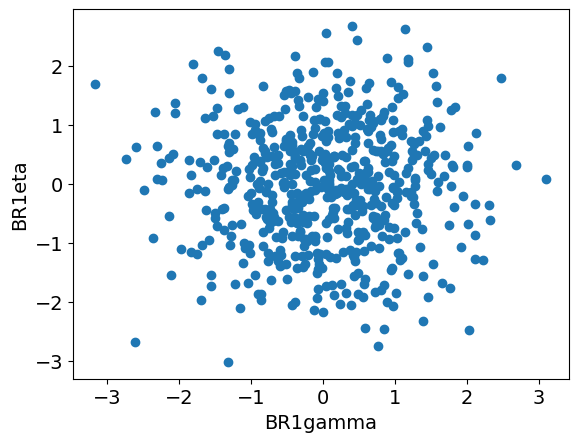

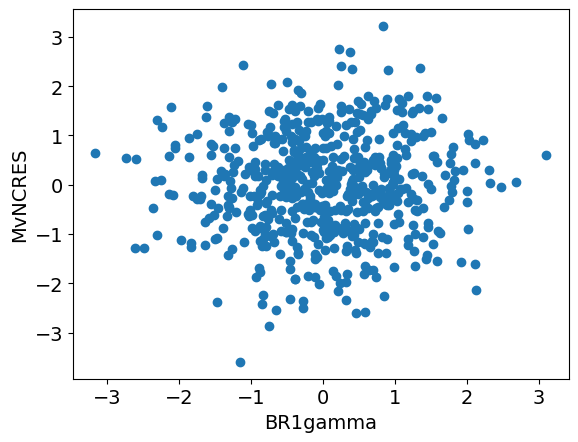

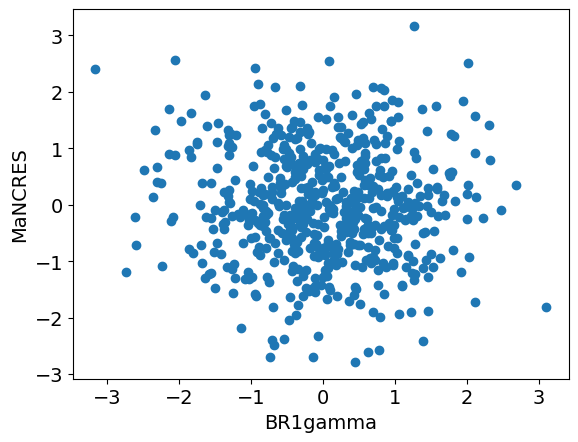

In [10]:
plt.figure()
plt.scatter(br1gamma_knob, br1eta_knob)
plt.xlabel("BR1gamma")
plt.ylabel("BR1eta")
plt.show()

plt.figure()
plt.scatter(br1gamma_knob, MvNCRES_knob)
plt.xlabel("BR1gamma")
plt.ylabel("MvNCRES")
plt.show()

plt.figure()
plt.scatter(br1gamma_knob, MaNCRES_knob)
plt.xlabel("BR1gamma")
plt.ylabel("MaNCRES")
plt.show()

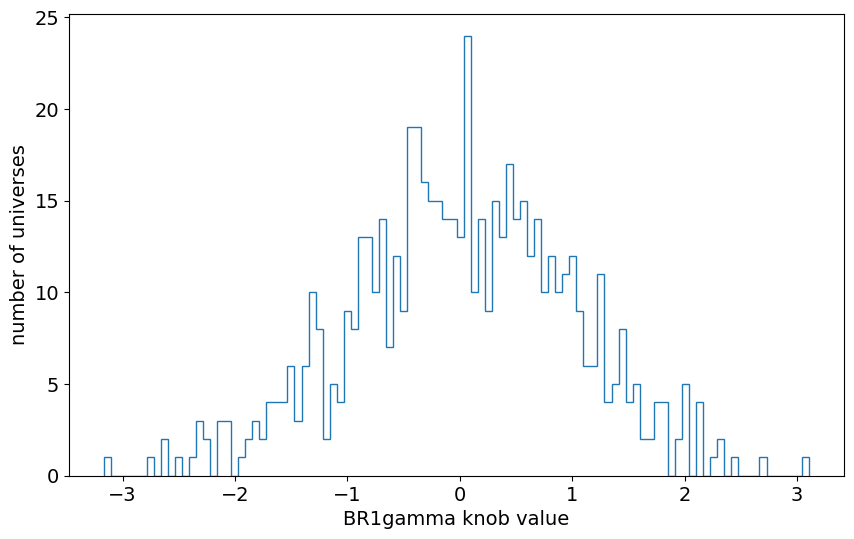

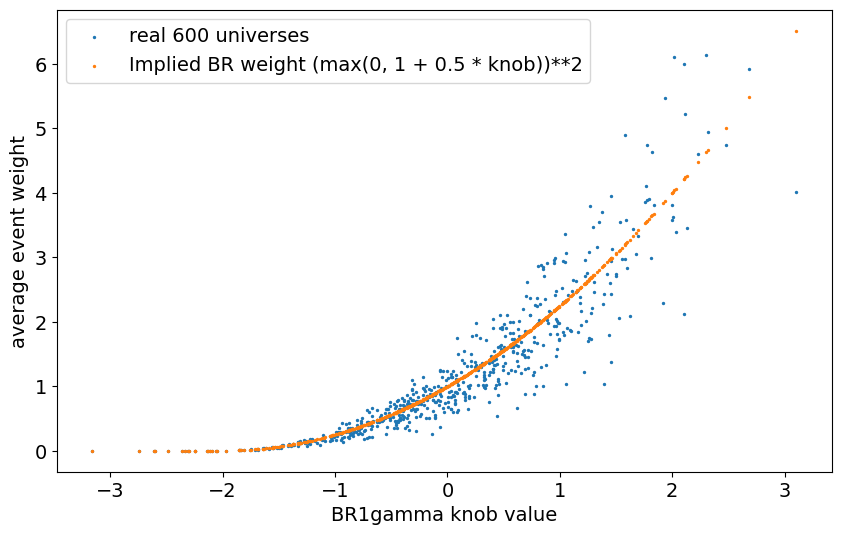

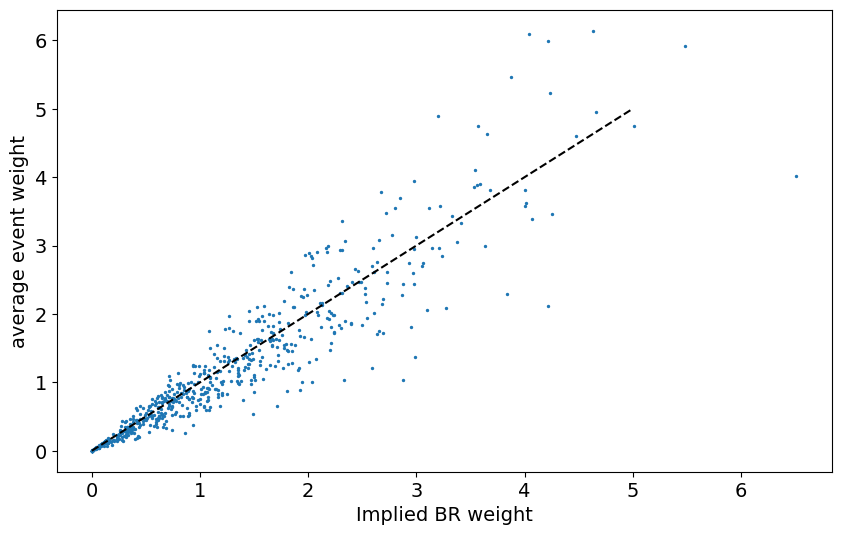

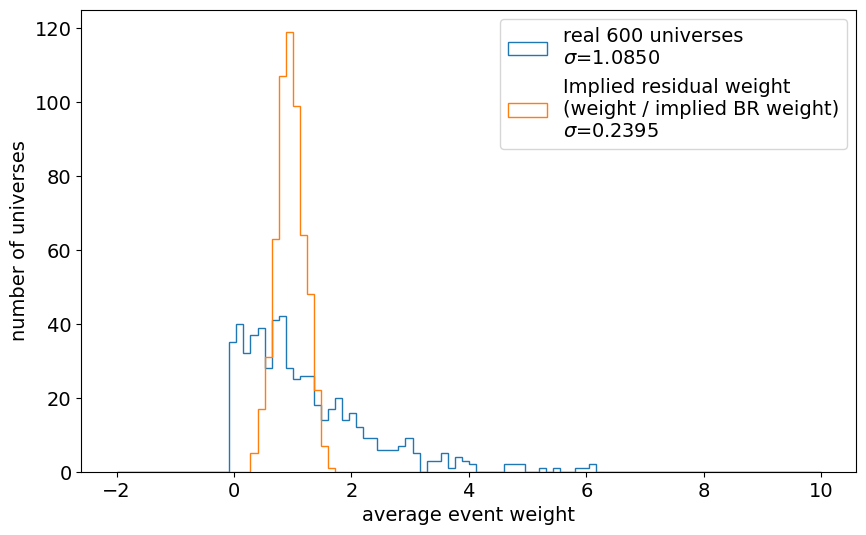

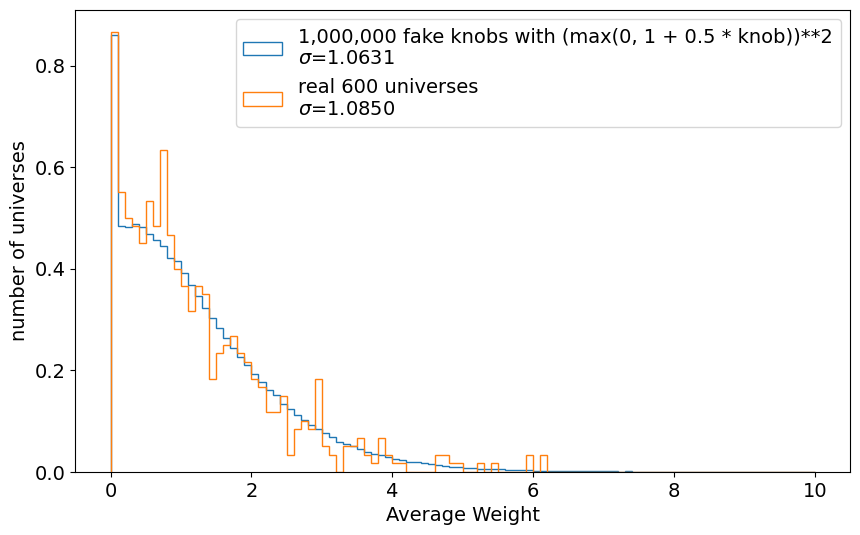

In [11]:
# https://github.com/GENIE-MC/Reweight/blob/acf8508b5ea4201fba6ac7b551a4f4bd694fab50/src/RwCalculators/GReWeightResonanceDecay.cxx#L172
"""if(tweaked_br1gamma) {
        double frerr = uncertainty->OneSigmaErr(kRDcyTwkDial_BR1gamma);
        double dial  = fBR1gammaTwkDial;
        double w = (1. + dial*frerr);
        w = TMath::Max(0.,w);
        TH1D * brfw  = fMpBR1gammaDef[p->Pdg()];
        double mass = p->P4()->M();
        mass = TMath::Min(mass, brfw->GetXaxis()->GetXmax());
        int ibin = brfw->FindBin(mass);
        double brdef = brfw->GetBinContent(ibin);
        double brtwk = brdef*w;
        if(brtwk>1) {
         brtwk = 1.;
         w = brtwk/brdef;
        }
        if(is_1gamma) {
         wght *= w;
        } else {
         wght *= ((1-brtwk)/(1-brdef));
        }
      }
"""

mpl.rcParams["font.size"] = 14

implied_weight = np.maximum((1 + 0.5 * br1gamma_knob), 0)**2


plt.figure(figsize=(10, 6))
plt.hist(br1gamma_knob, bins=100, histtype="step")
plt.xlabel("BR1gamma knob value")
plt.ylabel("number of universes")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(br1gamma_knob, real_600_unis, s=2, label="real 600 universes")
plt.scatter(br1gamma_knob, implied_weight, s=2, label="Implied BR weight (max(0, 1 + 0.5 * knob))**2")
plt.legend()
plt.xlabel("BR1gamma knob value")
plt.ylabel("average event weight")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(implied_weight, real_600_unis, s=2)
plt.plot([0, 5], [0, 5], color="k", linestyle="--")
plt.xlabel("Implied BR weight")
plt.ylabel("average event weight")
plt.show()

residual_weight = []
for uni_i in range(600):
    if implied_weight[uni_i] == 0:
        residual_weight.append(np.nan)
    else:
        residual_weight.append(real_600_unis[uni_i] / implied_weight[uni_i])

non_nan_residual_weight = [w for w in residual_weight if w==w]

bins = np.linspace(-2, 10, 101)

plt.figure(figsize=(10, 6))
plt.hist(real_600_unis, label="real 600 universes\n"fr"$\sigma$={np.std(real_600_unis):.4f}", bins=bins, histtype="step")
plt.hist(non_nan_residual_weight, label="Implied residual weight\n(weight / implied BR weight)\n"fr"$\sigma$={np.std(non_nan_residual_weight):.4f}", bins=bins, histtype="step")
plt.xlabel("average event weight")
plt.ylabel("number of universes")
plt.legend()
plt.show()


high_stats_fake_knobs = np.random.normal(0, 1, 1_000_000)
high_stats_fake_implied_weights = np.maximum((1 + 0.5 * high_stats_fake_knobs), 0)**2

bins = np.linspace(0, 10, 101)
plt.figure(figsize=(10, 6))
plt.hist(high_stats_fake_implied_weights, bins=bins, histtype="step", density=True, label="1,000,000 fake knobs with (max(0, 1 + 0.5 * knob))**2\n"fr"$\sigma$={np.std(high_stats_fake_implied_weights):.4f}")
plt.hist(real_600_unis, bins=bins, histtype="step", density=True, label="real 600 universes\n"fr"$\sigma$={np.std(real_600_unis):.4f}")
plt.legend()
plt.xlabel("Average Weight")
plt.ylabel("number of universes")
plt.show()



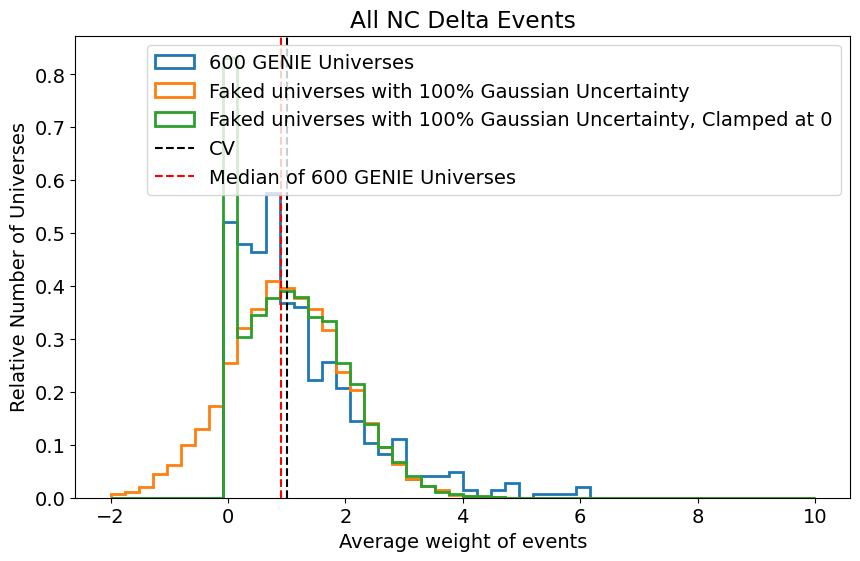

In [7]:
bins = np.linspace(-2, 10, 51)

faked_100_percent_gauss = np.random.normal(1, 1, 10000)
faked_100_percent_gauss_pos = np.maximum(np.random.normal(1, 1, 10000), 0)

plt.figure(figsize=(10, 6))
plt.hist(real_600_unis, bins=bins, histtype="step", density=True, lw=2, label="600 GENIE Universes")
plt.hist(faked_100_percent_gauss, bins=bins, histtype="step", density=True, lw=2, label="Faked universes with 100% Gaussian Uncertainty")
plt.hist(faked_100_percent_gauss_pos, bins=bins, histtype="step", density=True, lw=2, label="Faked universes with 100% Gaussian Uncertainty, Clamped at 0")
#plt.hist(faked_100_percent_uniform, bins=bins, histtype="step", density=True, lw=2, label="Faked universes with 100% Uniform Uncertainty")

plt.axvline(1, c="k", ls="--", label="CV")
plt.axvline(median_weighted_sum, c="r", ls="--", label="Median of 600 GENIE Universes")

plt.legend()
plt.xlabel("Average weight of events")
plt.ylabel("Relative Number of Universes")
plt.title("All NC Delta Events")
plt.show()


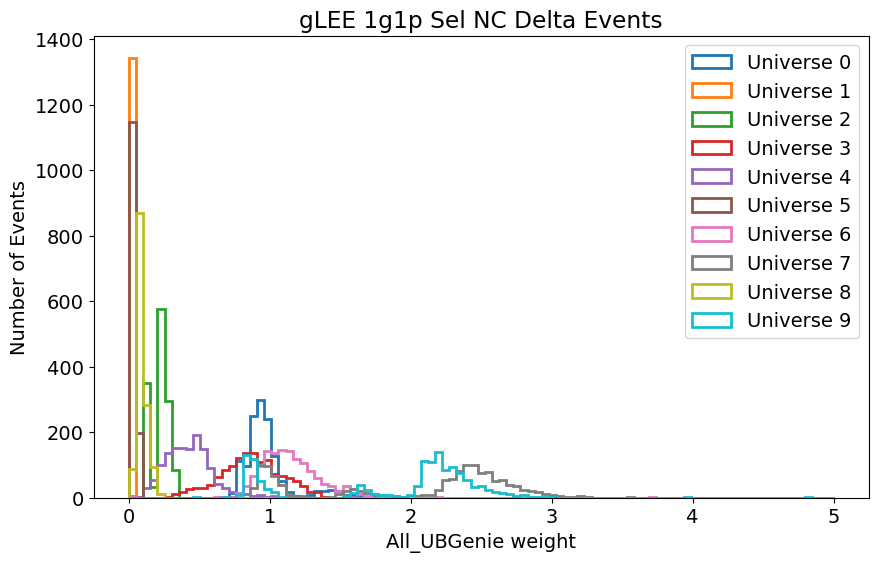

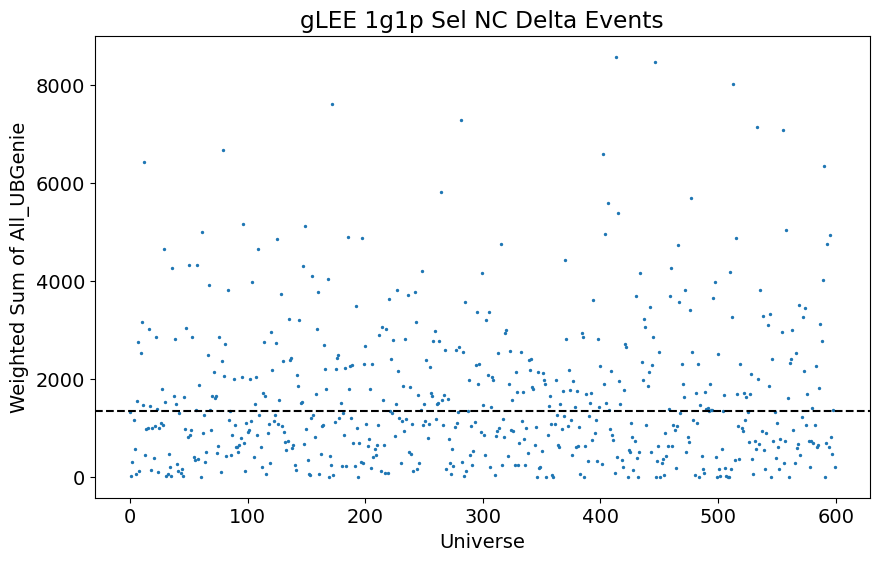

For gLEE 1g1p sel events:
standard deviation of Weighted Sum of All_UBGenie: 1458.6803288005
CV Sum of Weights: 1344.0
fractional error of Weighted Sum of All_UBGenie: 108.53276255956101 %
fractional error of Weighted Sum of All_UBGenie with -100% BR uncertainty: 42.18246731534382 %


In [8]:
df_1g1p = df.query("gl_sel_type == 1")
All_UBGenie_1g1p = df_1g1p["All_UBGenie"].to_numpy()
All_UBGenie_1g1p = np.array([All_UBGenie_1g1p[i] for i in range(len(All_UBGenie_1g1p))])

bins = np.linspace(0, 5, 100)

plt.figure(figsize=(10, 6))
for uni_i in range(10):
  plt.hist(All_UBGenie_1g1p[:, uni_i], bins=bins, histtype="step", lw=2, label=f"Universe {uni_i}")
plt.legend()
plt.xlabel("All_UBGenie weight")
plt.ylabel("Number of Events")
plt.title("gLEE 1g1p Sel NC Delta Events")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(range(600), np.sum(All_UBGenie_1g1p, axis=0), s=2)
plt.axhline(np.sum(df_1g1p["weight_cv"]), c="k", ls="--", label="CV")
plt.xlabel("Universe")
plt.ylabel("Weighted Sum of All_UBGenie")
plt.title("gLEE 1g1p Sel NC Delta Events")
plt.show()

print("For gLEE 1g1p sel events:")
print("standard deviation of Weighted Sum of All_UBGenie:", np.std(np.sum(All_UBGenie_1g1p, axis=0)))
#print("mean of Weighted Sum of All_UBGenie:", np.mean(np.sum(All_UBGenie, axis=0)))
print("CV Sum of Weights:", np.sum(df_1g1p["weight_cv"]))
frac_err_1g1p = np.std(np.sum(All_UBGenie_1g1p, axis=0)) / np.sum(df_1g1p["weight_cv"])
frac_err_br_removed_1g1p = np.sqrt(frac_err_1g1p**2 - 1)
print("fractional error of Weighted Sum of All_UBGenie:", frac_err_1g1p * 100, "%")
print("fractional error of Weighted Sum of All_UBGenie with -100% BR uncertainty:", frac_err_br_removed_1g1p * 100, "%")



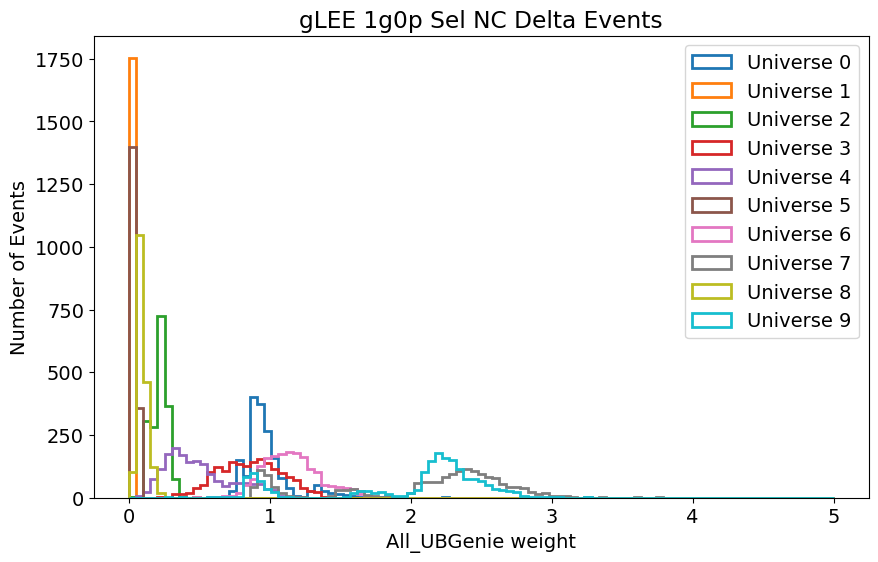

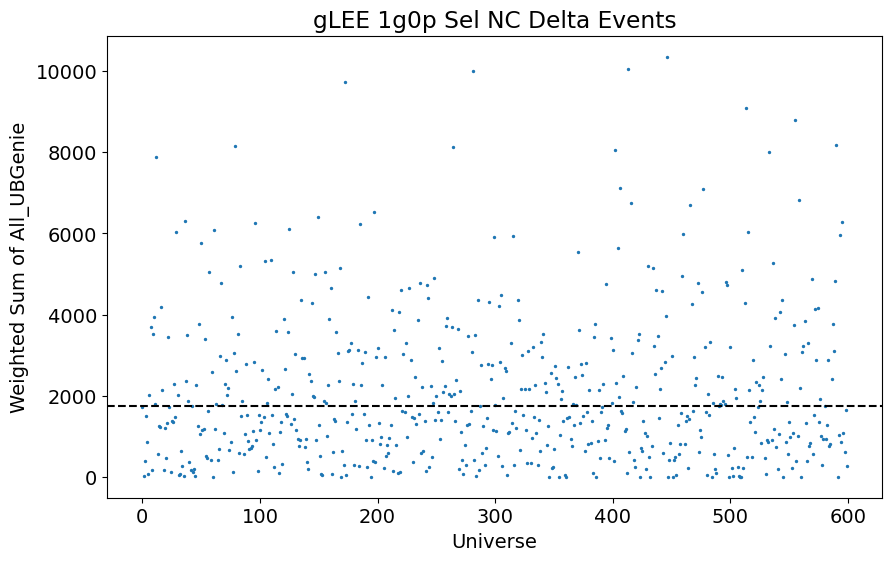

For gLEE 1g0p sel events:
standard deviation of Weighted Sum of All_UBGenie: 1843.9726546502552
CV Sum of Weights: 1754.0
fractional error of Weighted Sum of All_UBGenie: 105.12956982042505 %
fractional error of Weighted Sum of All_UBGenie with -100% BR uncertainty: 32.438040178587 %


In [9]:
df_1g0p = df.query("gl_sel_type == 2")
All_UBGenie_1g0p = df_1g0p["All_UBGenie"].to_numpy()
All_UBGenie_1g0p = np.array([All_UBGenie_1g0p[i] for i in range(len(All_UBGenie_1g0p))])

bins = np.linspace(0, 5, 100)

plt.figure(figsize=(10, 6))
for uni_i in range(10):
  plt.hist(All_UBGenie_1g0p[:, uni_i], bins=bins, histtype="step", lw=2, label=f"Universe {uni_i}")
plt.legend()
plt.xlabel("All_UBGenie weight")
plt.ylabel("Number of Events")
plt.title("gLEE 1g0p Sel NC Delta Events")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(range(600), np.sum(All_UBGenie_1g0p, axis=0), s=2)
plt.axhline(np.sum(df_1g0p["weight_cv"]), c="k", ls="--", label="CV")
plt.xlabel("Universe")
plt.ylabel("Weighted Sum of All_UBGenie")
plt.title("gLEE 1g0p Sel NC Delta Events")
plt.show()

print("For gLEE 1g0p sel events:")
print("standard deviation of Weighted Sum of All_UBGenie:", np.std(np.sum(All_UBGenie_1g0p, axis=0)))
#print("mean of Weighted Sum of All_UBGenie:", np.mean(np.sum(All_UBGenie, axis=0)))
print("CV Sum of Weights:", np.sum(df_1g0p["weight_cv"]))
frac_err_1g0p = np.std(np.sum(All_UBGenie_1g0p, axis=0)) / np.sum(df_1g0p["weight_cv"])
frac_err_br_removed_1g0p = np.sqrt(frac_err_1g0p**2 - 1)
print("fractional error of Weighted Sum of All_UBGenie:", frac_err_1g0p * 100, "%")
print("fractional error of Weighted Sum of All_UBGenie with -100% BR uncertainty:", frac_err_br_removed_1g0p * 100, "%")

